In [1]:
import sys
print(sys.executable)  # should contain "envs/forecast_env"

import numpy as np
import pandas as pd
from prophet import Prophet

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

/opt/anaconda3/envs/forecast_env/bin/python


/opt/anaconda3/envs/forecast_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


NumPy: 1.26.4
Pandas: 2.3.3


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_datareader import data as web     # instead of 'import pandas_datareader as web'
from prophet import Prophet                   # instead of fbprophet

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

NumPy: 1.26.4
Pandas: 2.3.3


In [4]:
import pandas as pd

data = pd.read_csv("google_stock_data.csv")
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,68.18681335449219,68.18681335449219,67.08132380627873,67.176977721624,27278000
3,2020-01-03,67.83010864257812,68.43940351728152,67.12267404619415,67.15655543577822,23408000
4,2020-01-06,69.63805389404297,69.66345923216974,67.30600805367692,67.33738843542059,46768000


In [8]:
data.columns.tolist()

['Price', 'Close', 'High', 'Low', 'Open', 'Volume']

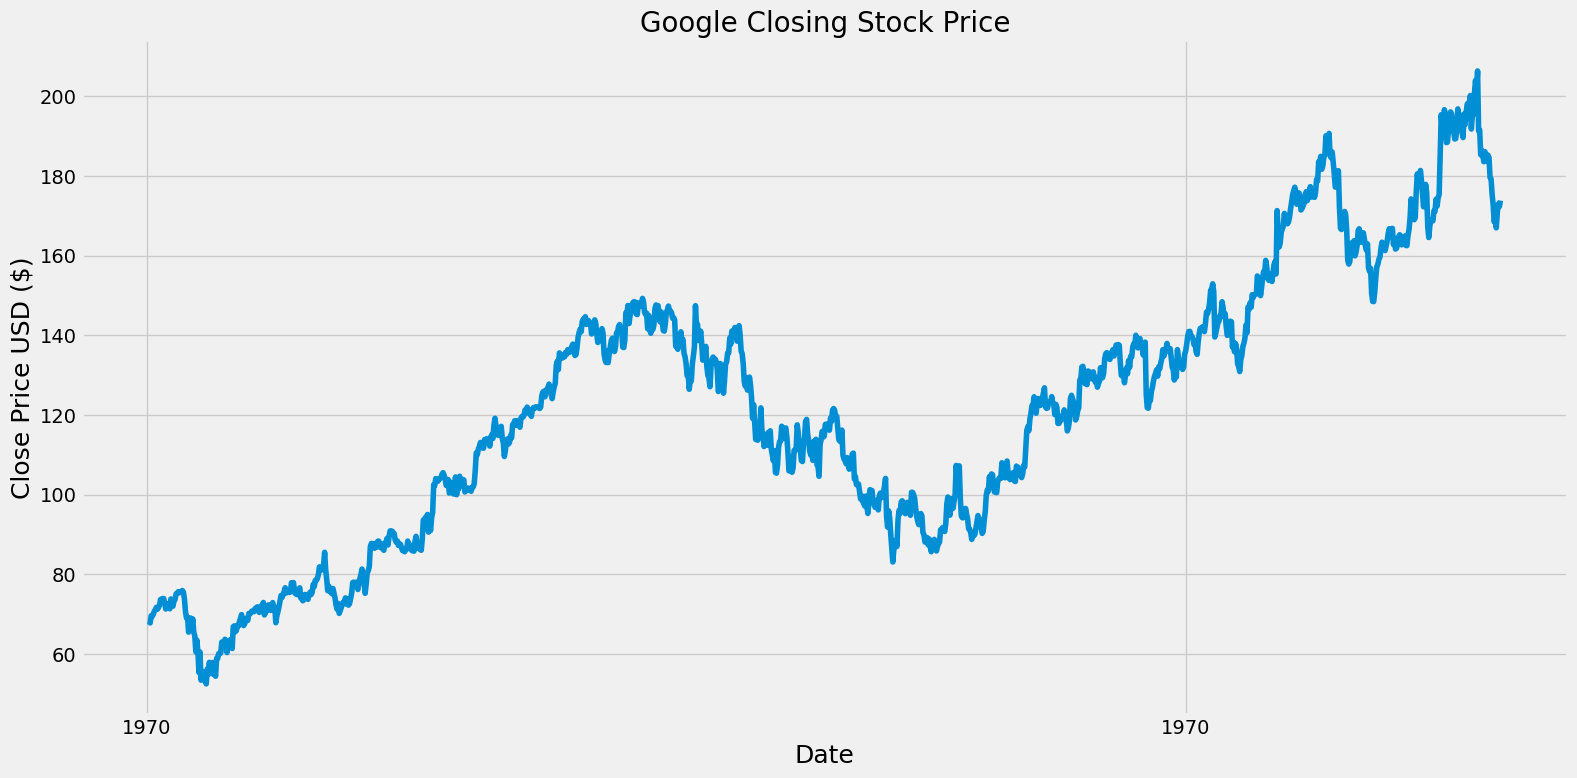

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Make sure the index is datetime (it holds your dates)
data.index = pd.to_datetime(data.index, errors='coerce')

# 2. Ensure Close is numeric
data["Close"] = pd.to_numeric(data["Close"], errors="coerce")

# 3. Plot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16, 8))

plt.plot(data.index, data["Close"])

plt.title("Google Closing Stock Price", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)

plt.tight_layout()
plt.show()

In [11]:
data = data.reset_index()

In [12]:
data = data.rename(columns={data.columns[0]: "Date"})
data = data[["Date", "Close"]]
data = data.rename(columns={"Date": "ds", "Close": "y"})
data["ds"] = pd.to_datetime(data["ds"], errors="coerce")
data.head()

,ds,y
0,1970-01-01 00:00:00.000000000,NaN
1,1970-01-01 00:00:00.000000001,NaN
2,1970-01-01 00:00:00.000000002,68.186813
3,1970-01-01 00:00:00.000000003,67.830109
4,1970-01-01 00:00:00.000000004,69.638054


In [18]:
data.head()
data.index
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [19]:
print("First 5 rows:")
print(data.head())

print("\nDate range:")
print("Min date:", data["ds"].min())
print("Max date:", data["ds"].max())

print("\nSome stats of y:")
print(data["y"].describe())

First 5 rows:
                             ds          y
0 1970-01-01 00:00:00.000000000        NaN
1 1970-01-01 00:00:00.000000001        NaN
2 1970-01-01 00:00:00.000000002  68.186813
3 1970-01-01 00:00:00.000000003  67.830109
4 1970-01-01 00:00:00.000000004  69.638054

Date range:
Min date: 1970-01-01 00:00:00
Max date: 1970-01-01 00:00:00.000001303

Some stats of y:
count    1302.000000
mean      121.022777
std        34.269184
min        52.516125
25%        94.346487
50%       121.344616
75%       142.033741
max       206.380005
Name: y, dtype: float64


In [24]:
# Drop the row where Date literally equals the string "Date"
data = data[data["Date"] != "Date"].copy()

# Convert Date to datetime
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# (Optional) sort by date just to be safe
data = data.sort_values("Date").reset_index(drop=True)

print(data.head())
print(data.dtypes)

        Date      Close       High        Low       Open      Volume
0 2020-01-02  68.186813  68.186813  67.081324  67.176978  27278000.0
1 2020-01-03  67.830109  68.439404  67.122674  67.156555  23408000.0
2 2020-01-06  69.638054  69.663459  67.306008  67.337388  46768000.0
3 2020-01-07  69.503548  69.921535  69.326691  69.770083  34330000.0
4 2020-01-08  69.998245  70.337515  69.379988  69.489089  35314000.0
Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume           float64
dtype: object


In [25]:
# Keep only what Prophet needs
data = data[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

print(data.head())
print(data.dtypes)

          ds          y
0 2020-01-02  68.186813
1 2020-01-03  67.830109
2 2020-01-06  69.638054
3 2020-01-07  69.503548
4 2020-01-08  69.998245
ds    datetime64[ns]
y            float64
dtype: object


14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:44 - cmdstanpy - INFO - Chain [1] done processing


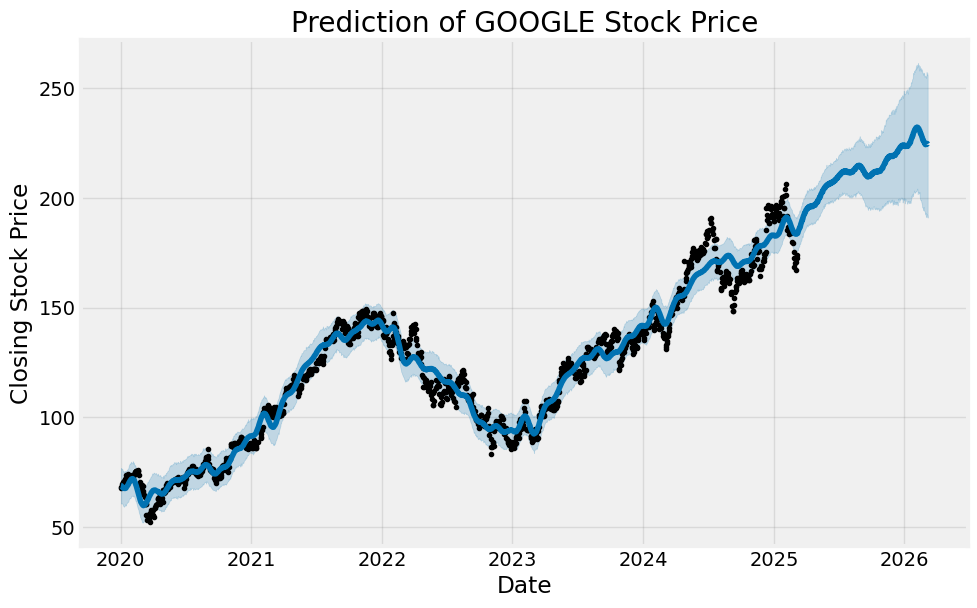

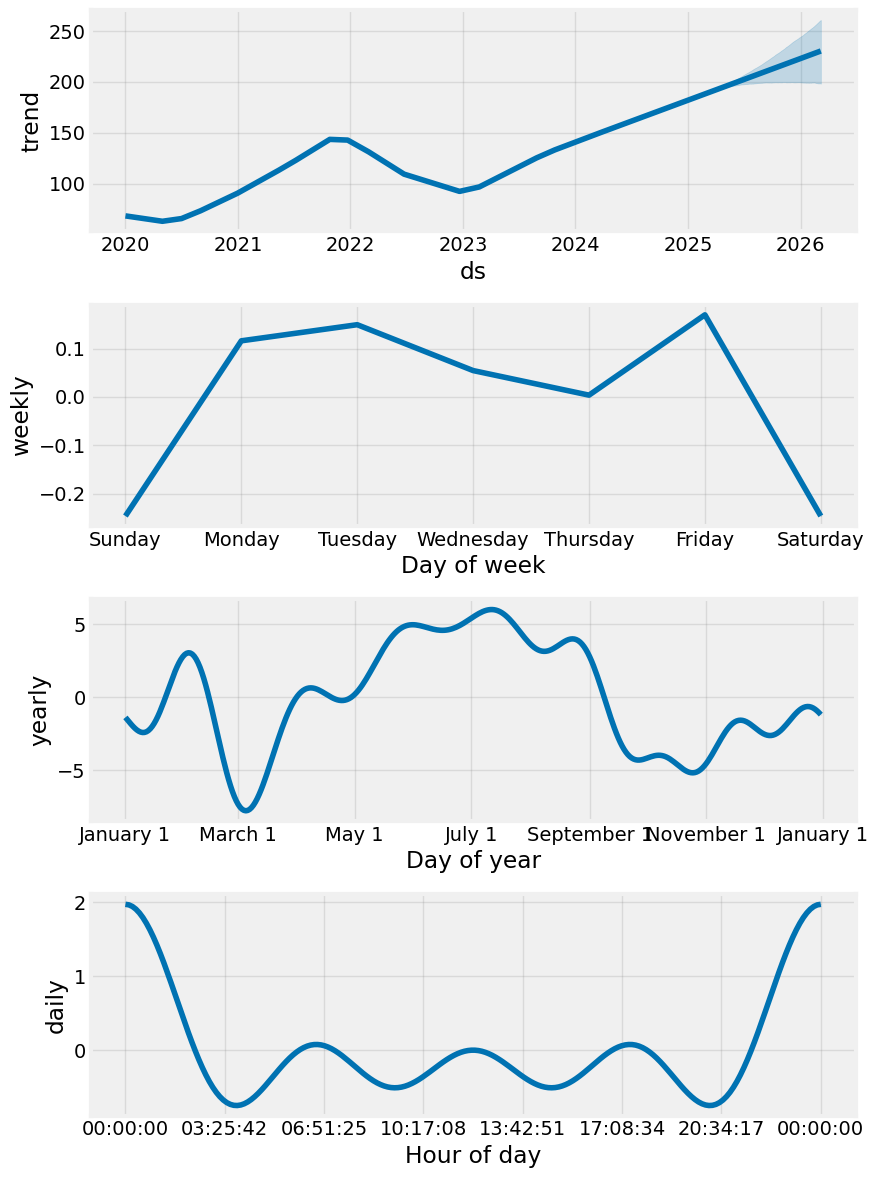

In [26]:
from prophet import Prophet
import matplotlib.pyplot as plt

m = Prophet(daily_seasonality=True)
m.fit(data)

future = m.make_future_dataframe(periods=365)  # 1 year ahead
forecast = m.predict(future)

fig = m.plot(forecast)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

fig2 = m.plot_components(forecast)
plt.show()